1. Сравните метрики hit_rate@k, precision@k.   
Какую метрику использовать предпочтительно и почему?  
Приведите пример 2-3 задач (опишите, что является клиентом, что товаром), в которой более уместно использовать метрику hit_rate?


2. В метрике NDCG@k мы используем логарифм в знаменателе. Как Вы думаете, почему именно логарифм? Какую функцию можно использовать вместо логарифма? Привидите пример метрик/подходов к предобработке данных/функций ошибок в ML, где также в  логарифм.



3. Какие еще метрики (Вы можете вспомнить уже пройденные Вами или посмотреть в интернете) могут использоваться для рекомендательных систем (приведите примеры метрики **и чем являются интеракции**, чтобы она могла быть использована).

4. boughted = [1, 3, 5, 7, 9, 11]  
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]  
Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, MRR@8,  
Сначала поссчитайет "руками", а затем подтвердите рассчеты с помощью функций (некоторые были на семинаре, некоторые нужно будут написать самостоятельно)

IDCG должен считаться для всех 8 позиций рекомендаций

**Пример выполнения 4го задания**

MSE на  
$y = [0, 2]$  
$y_{pred} = [1, 2]$

MSE = $0.5*((0 - 1)^2 + (2-2)^2) = 0.5$ 

In [2]:
import numpy as np
((np.array([0, 2]) - np.array([1, 2]))**2).mean()

0.5

1. Сравните метрики hit_rate@k, precision@k.   
Какую метрику использовать предпочтительно и почему?  
Приведите пример 2-3 задач (опишите, что является клиентом, что товаром), в которой более уместно использовать метрику hit_rate?

In [1]:
#Precision@k использовать предпочтительнее, поскольку precision@k дает понимание уровня качества нашей модели -  
#мы понимаем % приобретенных товаров от общего количества рекомендованных, 
#в то время как hit_rate@k принимают значение только 0 или 1, таким образом, отвечая нам на вопрос: 
#"сработала ли модель для конкретного пользователя?" толька "сработала или не сработала"

#Примеры задач, в которых уместнее использовать hit_rate:
# 1. Рекомендация товара комплимента к приобретаемому товару. Основной товар - User, товар-коплимент - Item.  Например, заказываем пиццу и нам к ней рекомендуют напиток, гарнир (к примеру картошка), либо еще одну маленькую пиццу
# 2. Рекомендации пользователей в социальных сетях на основе предпочтений пользователя. Пользователь серсиваса - User, рекомендуемый пользователь - Item. Например, по нашим интересам социальная сеть рекомендует - аккаунты домов моды, места развлечений, артистов прочее

2. В метрике NDCG@k мы используем логарифм в знаменателе. Как Вы думаете, почему именно логарифм? Какую функцию можно использовать вместо логарифма? Привидите пример метрик/подходов к предобработке данных/функций ошибок в ML, где также в  логарифм.

In [13]:
len(range(10))

10

[]

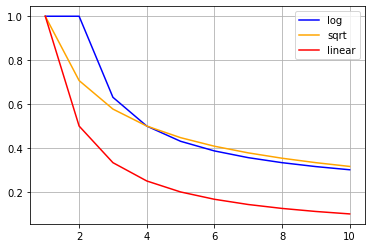

In [15]:
#На графике изображено применение логарифмов, квадратного корня и натуральных чисел. 
#Применение того или иного подхода влияет на скорость убывания функции: от наименьшего убывания - логарифм - к наибольшему - натуральные числа.
#В качестве альтернативы логарифму мы могли бы использовать квадратный корень

plt.plot([i for i in range(1,11)],[1 if i==1 else 1/np.log2(i) for i in range(1,11)],color='blue')
plt.plot([i for i in range(1,11)],[1 if i==1 else 1/np.sqrt(i) for i in range(1,11)],color='orange')
plt.plot([i for i in range(1,11)],[1 if i==1 else 1/i for i in range(1,11)],color='red')
plt.legend(['log','sqrt','linear'])
plt.grid()
plt.plot()

4. boughted = [1, 3, 5, 7, 9, 11]  
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]  
Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, MRR@8,  
Сначала поссчитайет "руками", а затем подтвердите рассчеты с помощью функций (некоторые были на семинаре, некоторые нужно будут написать самостоятельно)

IDCG должен считаться для всех 8 позиций рекомендаций

In [16]:
boughted = [1, 3, 5, 7, 9, 11]  
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

In [18]:
#pr@8:
#ручной расчет:
recommended_at_8=recommended[:8]
pr_at_8_manual=(boughted[2]/boughted[2]+boughted[3]/boughted[3]+boughted[-2]/boughted[-2]+boughted[-1]/boughted[-1])/len(recommended_at_8)
pr_at_8_manual

0.5

In [21]:
#pr@8:
#расчет функцией:
def pr_at_8_func(recommended,boughted):
    boughted=np.array(boughted)
    recommended_at_8=np.array(recommended)[:8]
    
    included_into_list=np.isin(recommended_at_8,boughted)
    
    return np.sum(included_into_list)/len(recommended_at_8)

In [22]:
pr_at_8_func(recommended,boughted)

0.5

In [23]:
#rec@8:
#ручной расчет:
rec_at_8_manual=(boughted[2]/boughted[2]+boughted[3]/boughted[3]+boughted[-2]/boughted[-2]+boughted[-1]/boughted[-1])/len(boughted)
rec_at_8_manual

0.6666666666666666

In [24]:
#rec@8:
#расчет функцией:
def rec_at_8_func(recommended,boughted):
    boughted=np.array(boughted)
    recommended_at_8=np.array(recommended)[:8]
    
    included_into_list=np.isin(recommended_at_8,boughted)
    
    return np.sum(included_into_list)/len(boughted)

In [25]:
rec_at_8_func(recommended,boughted)

0.6666666666666666

In [26]:
#AP@8:
#ручной расчет:
ap_at_8=(0*recommended_at_8[0]/len(recommended_at_8[:1])+1*(0+1)/len(recommended_at_8[:2])+1*(0+1+1)/len(recommended_at_8[:3])+0*(0+1+1+0)/len(recommended_at_8[:4])+1*(0+1+1+0+1)/len(recommended_at_8[:5])+1*(0+1+1+0+1+1)/len(recommended_at_8[:6])+0*(0+1+1+0+1+1+0)/len(recommended_at_8[:7])+0*(0+1+1+0+1+1+0+0)/len(recommended_at_8[:8]))/len(recommended_at_8)
ap_at_8

0.30416666666666664

In [27]:
#AP@8:
#расчет функцией:
def ap_at_value(boughted,recommended,k):
    boughted_inside=np.array(boughted)
    recommended_inside=np.array(recommended)[:k]
    
    
    def pr_at_value_func(recommended_in_in,boughted_in_in):
        included_into_list=np.isin(recommended_in_in,boughted_in_in)
        return np.sum(included_into_list)/len(recommended_in_in)
    
    sum_=0
    
    for element in enumerate(recommended_inside):
        l=element[0]+1
        pr=pr_at_value_func(recommended_inside[:l],boughted_inside)
        if element[1] in boughted_inside:
            sum_+=1*pr
        else:
            sum_+=0*pr
    
    return sum_/len(recommended_inside)

In [28]:
ap_at_value(boughted,recommended,8)

0.30416666666666664

In [29]:
#NDCG@8:
#ручной расчет:
NDCG_at_8_manual=(1/len(recommended[:8])*(0+1/np.log2(2)+1/np.log2(3)+0/np.log2(4)+1/np.log2(5)+1/np.log2(6)+0/np.log2(7)+0/np.log2(8)))/(1/len(recommended[:8])*(1+1/np.log2(2)+1/np.log2(3)+1/np.log2(4)+1/np.log2(5)+1/np.log2(6)+1/np.log2(7)+1/np.log2(8)))
NDCG_at_8_manual

0.5279127445637272

In [30]:
#NDCG@8:
#расчет функцией:
def ndcg_at_value(boughted,recommended,k):
    boughted_inside=np.array(boughted)
    recommended_inside=np.array(recommended)[:k]
    
    included_into_list=np.isin(recommended_inside,boughted_inside)
    
    def dcg(list_):
        sum_=0
        for element in enumerate(list_):
            if element[1]:
                if element[0]+1==1:
                    sum_+=1
                else:
                    sum_+=1/np.log2(element[0]+1)
            else:
                continue   
        return sum_/len(list_)
    
    
    def ideal_dcg(list_):
        sum_=0
        ideal_list=['True']*len(list_)
        for element in enumerate(list_):
                if element[0]+1==1:
                    sum_+=1
                else:
                    sum_+=1/np.log2(element[0]+1)
                
        return sum_/len(list_)
    
    ndcg=dcg(included_into_list)/ideal_dcg(included_into_list)
    
    return ndcg

In [31]:
ndcg_at_value(boughted,recommended,8)

0.5279127445637272

In [32]:
#MRR@8:
#ручной расчет:
mean_reciprocal_rank_at_8_manual=(1/(recommended[:8].index(recommended[:8][1])+1)+1/(recommended[:8].index(recommended[:8][2])+1)+1/(recommended[:8].index(recommended[:8][4])+1)+1/(recommended[:8].index(recommended[:8][5])+1))/len(recommended[:8])
mean_reciprocal_rank_at_8_manual

0.15

In [33]:
#MRR@8:
#расчет функцией:
def mean_reciprocal_rank(recommended_list, bought_list,k):
    ranks=0.
    for i, item_rec in enumerate(recommended_list[:k]):
        for item_bought in bought_list:
            if item_rec == item_bought:
                ranks += 1 / (i+1)
    return ranks / len(recommended_list[:k])

In [34]:
mean_reciprocal_rank(recommended,boughted,8)

0.15